In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [2]:
import pandas as pd

df = pd.read_csv('train_data.csv')

X = df["content"]
y = df["sentiment"]

In [3]:
X = df["content"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [5]:
new_content = ["I am so happy today!", "Feeling down and out..."]
probabilities = model.predict_proba(new_content)

# Get the class names (emotions)
class_names = model.classes_

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report


# Split the Data into Training and Testing Sets
X = df["content"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and Train the Model Pipeline with Logistic Regression
model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.35333333333333333
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        23
     boredom       0.00      0.00      0.00        28
       empty       0.33      0.01      0.02       126
  enthusiasm       0.00      0.00      0.00       103
         fun       0.29      0.03      0.06       219
   happiness       0.35      0.32      0.33       590
        hate       0.41      0.13      0.19       239
        love       0.45      0.23      0.31       426
     neutral       0.34      0.46      0.39      1257
      relief       0.57      0.02      0.03       230
     sadness       0.36      0.32      0.34       969
    surprise       0.28      0.03      0.06       310
       worry       0.35      0.60      0.44      1480

    accuracy                           0.35      6000
   macro avg       0.29      0.17      0.17      6000
weighted avg       0.35      0.35      0.32      6000



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("wordnet")

# Text Preprocessing
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

import pandas as pd

df = pd.read_csv("train_data.csv")

X = df["content"]
y = df["sentiment"]


def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


# Assume `df` is the pandas dataframe with the 'content' and 'sentiment' columns
df["content"] = df["content"].apply(preprocess_text)

# Split the Data into Training and Testing Sets
X = df["content"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Logistic Regression Pipeline with TF-IDF and Hyperparameter Tuning
param_grid = {
    "logisticregression__C": [0.01, 0.1, 1, 10, 100],
    "logisticregression__penalty": ["l2"],
}

# Using TF-IDF Vectorizer with n-grams and adjusting min_df/max_df
model_lr = make_pipeline(
    TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2)),  # Adjusting TF-IDF
    LogisticRegression(max_iter=1000, class_weight="balanced"),  # Class balancing
)

# GridSearchCV to find the best hyperparameters
grid = GridSearchCV(model_lr, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Best Logistic Regression Model
best_model_lr = grid.best_estimator_

# Evaluate Logistic Regression Model
y_pred_lr = best_model_lr.predict(X_test)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(
    "Logistic Regression Classification Report:\n",
    classification_report(y_test, y_pred_lr),
)

# Now let's compare with SVM
model_svm = make_pipeline(
    TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2)),
    SVC(class_weight="balanced"),  # SVM with class balancing
)
model_svm.fit(X_train, y_train)

# Evaluate SVM Model
y_pred_svm = model_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

[nltk_data] Downloading package stopwords to C:\Users\Aneesh
[nltk_data]     Angane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aneesh
[nltk_data]     Angane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tuned Logistic Regression Accuracy: 0.229
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        23
     boredom       0.00      0.00      0.00        28
       empty       0.05      0.13      0.08       126
  enthusiasm       0.05      0.13      0.07       103
         fun       0.07      0.13      0.09       219
   happiness       0.25      0.26      0.25       590
        hate       0.18      0.28      0.22       239
        love       0.25      0.30      0.27       426
     neutral       0.33      0.21      0.26      1257
      relief       0.11      0.17      0.13       230
     sadness       0.33      0.28      0.30       969
    surprise       0.10      0.16      0.12       310
       worry       0.39      0.23      0.29      1480

    accuracy                           0.23      6000
   macro avg       0.16      0.18      0.16      6000
weighted avg       0.28      0.23      0.24     

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Save the model to a file
import joblib

joblib.dump(model, "emotion_classifier_model.pkl")

['emotion_classifier_model.pkl']

Logistic Regression Confidence Scores:


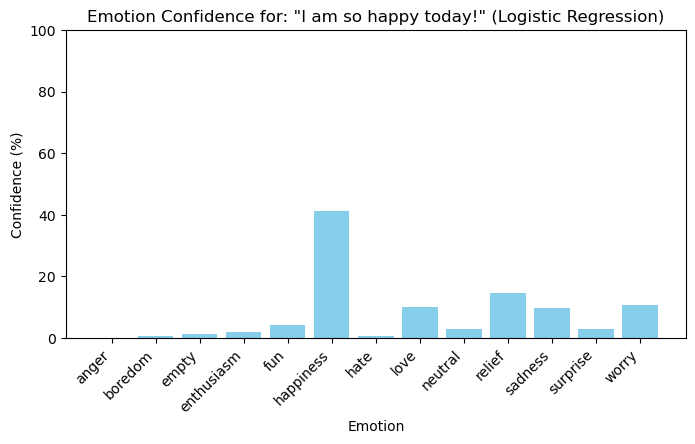

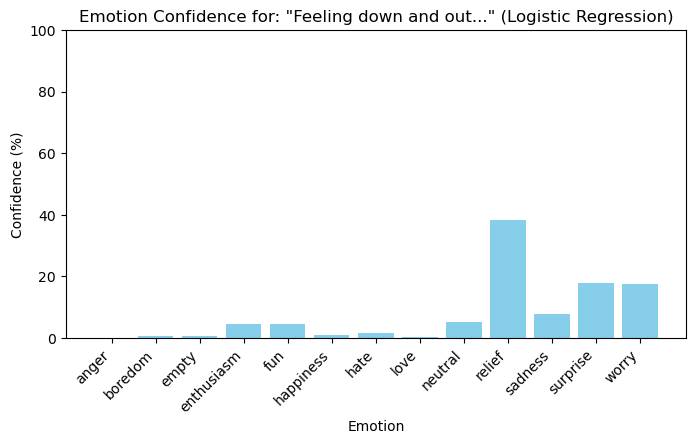

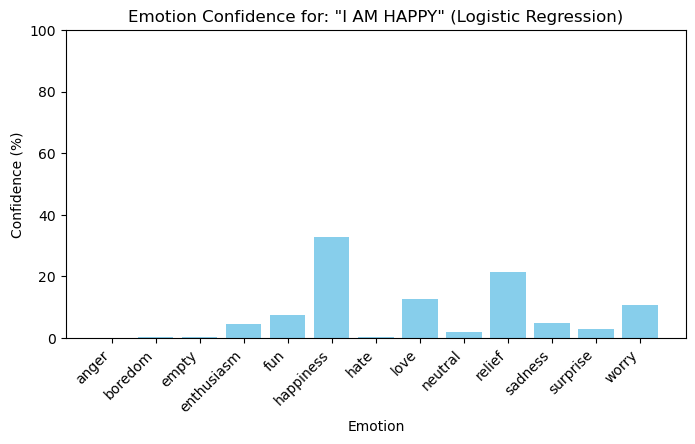

SVM Decision Scores:


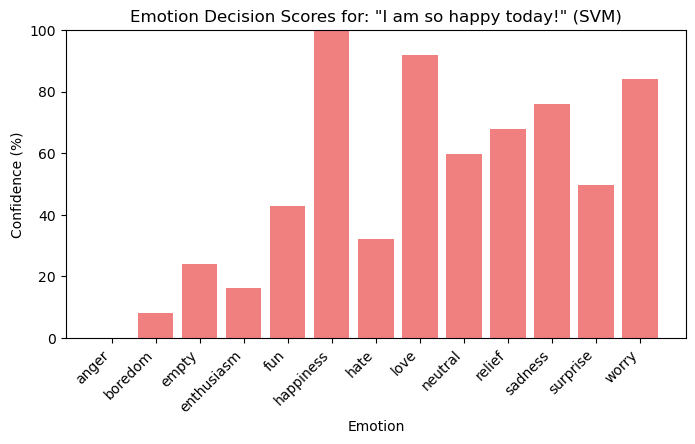

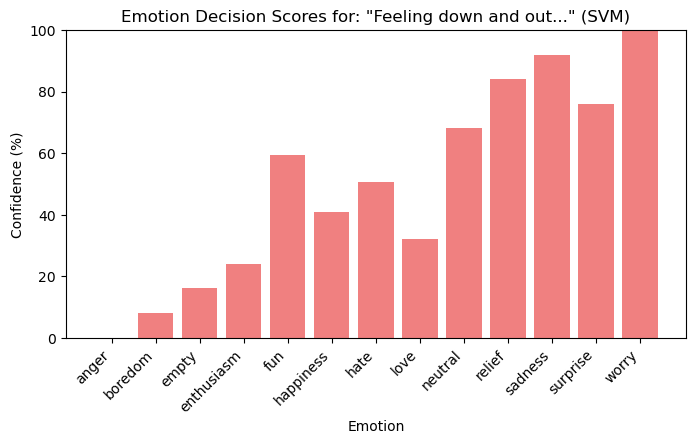

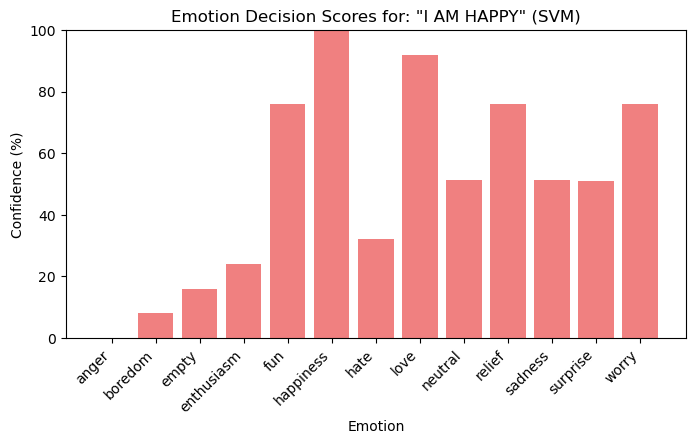

In [3]:
import joblib
import matplotlib.pyplot as plt

# Assuming you've trained `best_model_lr` and `model_svm` as per the previous code

# Save both models to disk
joblib.dump(best_model_lr, "logistic_regression_emotion_model.pkl")
joblib.dump(model_svm, "svm_emotion_model.pkl")

# Load the saved models for later use
logistic_model = joblib.load("logistic_regression_emotion_model.pkl")
svm_model = joblib.load("svm_emotion_model.pkl")

# New content to classify
new_content = [
    "I am so happy today!",
    "Feeling down and out...",
    "I AM HAPPY",
]

# Use the loaded Logistic Regression model to predict probabilities
logistic_probabilities = logistic_model.predict_proba(new_content)
svm_probabilities = svm_model.decision_function(
    new_content
)  # SVM gives decision scores instead of probabilities

# Get the class names (emotions) from the Logistic Regression model
class_names = logistic_model.classes_

# Plot Logistic Regression Confidence Scores
print("Logistic Regression Confidence Scores:")
for i, (text, prob) in enumerate(zip(new_content, logistic_probabilities)):
    plt.figure(figsize=(8, 4))
    plt.bar(class_names, prob * 100, color="skyblue")
    plt.xlabel("Emotion")
    plt.ylabel("Confidence (%)")
    plt.title(f'Emotion Confidence for: "{text}" (Logistic Regression)')
    plt.ylim(0, 100)  # Set the y-axis limits to 0-100%
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Since SVM doesn't return probabilities, scale decision scores for plotting
print("SVM Decision Scores:")
for i, (text, scores) in enumerate(zip(new_content, svm_probabilities)):
    # Normalize SVM decision scores for visualization (as they don't return probabilities)
    normalized_scores = (scores - scores.min()) / (scores.max() - scores.min())
    plt.figure(figsize=(8, 4))
    plt.bar(class_names, normalized_scores * 100, color="lightcoral")
    plt.xlabel("Emotion")
    plt.ylabel("Confidence (%)")
    plt.title(f'Emotion Decision Scores for: "{text}" (SVM)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha="right")
    plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Aneesh
[nltk_data]     Angane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aneesh
[nltk_data]     Angane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tuned Logistic Regression Accuracy: 0.229
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        23
     boredom       0.00      0.00      0.00        28
       empty       0.05      0.13      0.08       126
  enthusiasm       0.05      0.13      0.07       103
         fun       0.07      0.13      0.09       219
   happiness       0.25      0.26      0.25       590
        hate       0.18      0.28      0.22       239
        love       0.25      0.30      0.27       426
     neutral       0.33      0.21      0.26      1257
      relief       0.11      0.17      0.13       230
     sadness       0.33      0.28      0.30       969
    surprise       0.10      0.16      0.12       310
       worry       0.39      0.23      0.29      1480

    accuracy                           0.23      6000
   macro avg       0.16      0.18      0.16      6000
weighted avg       0.28      0.23      0.24     

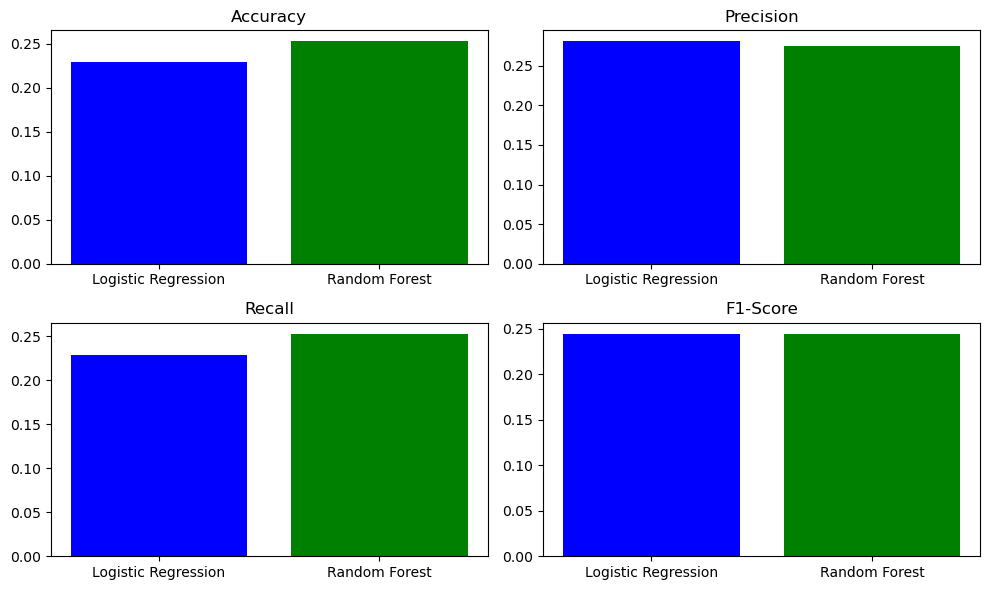

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_recall_fscore_support,
)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("wordnet")

# Text Preprocessing
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Load data
df = pd.read_csv("train_data.csv")


# Preprocess Text Function
def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


# Apply preprocessing to text data
df["content"] = df["content"].apply(preprocess_text)

# Split data into training and testing sets
X = df["content"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression Pipeline with TF-IDF and Hyperparameter Tuning
param_grid_lr = {
    "logisticregression__C": [0.01, 0.1, 1, 10, 100],
    "logisticregression__penalty": ["l2"],
}

# Logistic Regression Model Pipeline
model_lr = make_pipeline(
    TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2)),
    LogisticRegression(max_iter=1000, class_weight="balanced"),
)

# GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best Logistic Regression Model
best_model_lr = grid_lr.best_estimator_

# Evaluate Logistic Regression
y_pred_lr = best_model_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Tuned Logistic Regression Accuracy:", lr_accuracy)
print(
    "Logistic Regression Classification Report:\n",
    classification_report(y_test, y_pred_lr),
)

# Random Forest Pipeline with TF-IDF
param_grid_rf = {
    "randomforestclassifier__n_estimators": [100, 200],
    "randomforestclassifier__max_depth": [10, 20, 30],
}

model_rf = make_pipeline(
    TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2)),
    RandomForestClassifier(class_weight="balanced", random_state=42),
)

# GridSearchCV for Random Forest
grid_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best Random Forest Model
best_model_rf = grid_rf.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Tuned Random Forest Accuracy:", rf_accuracy)
print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)

# Plotting Accuracy, Precision, Recall, and F1-Score
models = ["Logistic Regression", "Random Forest"]
accuracies = [lr_accuracy, rf_accuracy]

# Get precision, recall, f1-score for both models
lr_metrics = precision_recall_fscore_support(y_test, y_pred_lr, average="weighted")
rf_metrics = precision_recall_fscore_support(y_test, y_pred_rf, average="weighted")

precisions = [lr_metrics[0], rf_metrics[0]]
recalls = [lr_metrics[1], rf_metrics[1]]
f1_scores = [lr_metrics[2], rf_metrics[2]]

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color=["blue", "green"])
plt.title("Accuracy")

plt.subplot(2, 2, 2)
plt.bar(models, precisions, color=["blue", "green"])
plt.title("Precision")

plt.subplot(2, 2, 3)
plt.bar(models, recalls, color=["blue", "green"])
plt.title("Recall")

plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color=["blue", "green"])
plt.title("F1-Score")

plt.tight_layout()
plt.show()